In [457]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pdb
import tqdm

その１

In [487]:
#Adagrad
class ScratchDeepNeuralNetrowkClassifier1:
    def __init__(self, n_features, n_nodes1, n_nodes2,  n_output, sigma=0.01, lr=0.01, n_iter=10, verbose = True):
        self.verbose = verbose
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.lr = lr
        self.iter = n_iter
        self.batch_size = 20
        self.cost_list = []
        self.cost_list_tr = []
        self.cost_list_val = []
        self.iter = n_iter
        self.sigma = sigma
        self.A1 = None
        self.A2 = None
        self.A3 = None
        self.Z1 = None
        self.Z2 = None
        self.Z3 = None
        self.FC1 = None
        self.FC2 = None
        self.FC3 = None
        self.x_batch = None
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """ 
        #インスタンス作成
        optimizer1 = AdaGrad(self.lr, self.n_features, self.n_nodes1)
        optimizer2 = AdaGrad(self.lr, self.n_nodes1, self.n_nodes2)
        optimizer3 = AdaGrad(self.lr, self.n_nodes2, self.n_output)
        xa1 = XavierInitializer()
        xa2 = XavierInitializer()
        xa3 = XavierInitializer()
        self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(xa1.xavier(self.n_features)), optimizer1)
        self.activation1 = Tanh()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(xa2.xavier(self.n_nodes1)), optimizer2)
        self.activation2 = Tanh()
        self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(xa3.xavier(self.n_nodes2)), optimizer3)
        self.activation3 = Softmax()
        
        for ite in range(self.iter):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            for x_batch, y_batch in get_mini_batch:
                self.x_batch = x_batch
                self.forward(x_batch)
                self.backward(y_batch)
                
            if X_val is not None:
                Z3 = self.forward(X_val)
                
                cost = self.activation3.cost(Z3, y_val, len(y_val))
                self.cost_list_val.append(cost)
                self.cost_list_tr.append(np.mean(self.cost_list))
                self.cost_list = []
            
            if self.verbose:
                print("{}回目".format(ite+1))
            
                 

    def forward(self, X):
        self.A1 = self.FC1.forward(X)
        self.Z1 = self.activation1.forward(self.A1)
        self.A2 = self.FC2.forward(self.Z1)
        self.Z2 = self.activation2.forward(self.A2)
        self.A3 = self.FC3.forward(self.Z2)
        self.Z3 = self.activation3.forward(self.A3)
        return self.Z3

        
    def backward(self, y):
        dA3 = self.activation3.backward(self.Z3, y) # 交差エントロピー誤差とソフトマックスを合わせている
        cost = self.activation3.cost(self.Z3, y, self.batch_size)
        self.cost_list.append(cost)
        dZ2 = self.FC3.backward(dA3, self.Z2)
        dA2 = self.activation2.backward(self.A2, dZ2)
        dZ1 = self.FC2.backward(dA2, self.Z1)
        dA1 = self.activation1.backward(self.A1, dZ1)
        dZ0 = self.FC1.backward(dA1, self.x_batch)
        

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pred = self.forward(X)
        pred_num = np.argmax(pred, axis=1)        
        return pred_num

その２

In [486]:
#SGD
class ScratchDeepNeuralNetrowkClassifier2:
    def __init__(self, n_features, n_nodes1, n_nodes2,  n_output, sigma=0.01, lr=0.01, n_iter=10, verbose = True):
        self.verbose = verbose
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.lr = lr
        self.iter = n_iter
        self.batch_size = 20
        self.cost_list = []
        self.cost_list_tr = []
        self.cost_list_val = []
        self.iter = n_iter
        self.sigma = sigma
        self.A1 = None
        self.A2 = None
        self.A3 = None
        self.Z1 = None
        self.Z2 = None
        self.Z3 = None
        self.FC1 = None
        self.FC2 = None
        self.FC3 = None
        self.x_batch = None
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """ 
    # このfor文内でミニバッチが使える
        #インスタンス作成
        optimizer = SGD(self.lr)
        xa1 = XavierInitializer()
        xa2 = XavierInitializer()
        xa3 = XavierInitializer()
        self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(xa1.xavier(self.n_features)), optimizer)
        self.activation1 = Tanh()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(xa2.xavier(self.n_nodes1)), optimizer)
        self.activation2 = Tanh()
        self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(xa3.xavier(self.n_nodes2)), optimizer)
        self.activation3 = Softmax()
        
        for ite in range(self.iter):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            for x_batch, y_batch in get_mini_batch:
                self.x_batch = x_batch
                self.forward(x_batch)
                self.backward(y_batch)
                
            if X_val is not None:
                Z3 = self.forward(X_val)
                
                cost = self.activation3.cost(Z3, y_val, len(y_val))
                self.cost_list_val.append(cost)
                self.cost_list_tr.append(np.mean(self.cost_list))
                self.cost_list = []
            
            if self.verbose:
                print("{}回目".format(ite+1))
            
                 

    def forward(self, X):
        self.A1 = self.FC1.forward(X)
        self.Z1 = self.activation1.forward(self.A1)
        self.A2 = self.FC2.forward(self.Z1)
        self.Z2 = self.activation2.forward(self.A2)
        self.A3 = self.FC3.forward(self.Z2)
        self.Z3 = self.activation3.forward(self.A3)
        return self.Z3

        
    def backward(self, y):
        dA3 = self.activation3.backward(self.Z3, y) # 交差エントロピー誤差とソフトマックスを合わせている
        cost = self.activation3.cost(self.Z3, y, self.batch_size)
        self.cost_list.append(cost)
        dZ2 = self.FC3.backward(dA3, self.Z2)
        dA2 = self.activation2.backward(self.A2, dZ2)
        dZ1 = self.FC2.backward(dA2, self.Z1)
        dA1 = self.activation1.backward(self.A1, dZ1)
        dZ0 = self.FC1.backward(dA1, self.x_batch)
        

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pred = self.forward(X)
        pred_num = np.argmax(pred, axis=1)        
        return pred_num

その３

In [493]:
#４層、ノードを減らす（）、活性化関数をtanh⇨sigmoidに変更、SGD
class ScratchDeepNeuralNetrowkClassifier3:
    def __init__(self, n_features, n_nodes1, n_nodes2,  n_nodes3, n_output, sigma=0.01, lr=0.01, n_iter=10, verbose = True):
        self.verbose = verbose
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_nodes3 = n_nodes3
        self.n_output = n_output
        self.lr = lr
        self.iter = n_iter
        self.batch_size = 20
        self.cost_list = []
        self.cost_list_tr = []
        self.cost_list_val = []
        self.iter = n_iter
        self.sigma = sigma
        self.A1 = None
        self.A2 = None
        self.A3 = None
        self.Z1 = None
        self.Z2 = None
        self.Z3 = None
        self.FC1 = None
        self.FC2 = None
        self.FC3 = None
        self.FC4 = None
        self.x_batch = None
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """ 
    # このfor文内でミニバッチが使える
        #インスタンス作成
        optimizer = SGD(self.lr)
        xa1 = XavierInitializer()
        xa2 = XavierInitializer()
        xa3 = XavierInitializer()
        xa4 = XavierInitializer()
        self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(xa1.xavier(self.n_features)), optimizer)
        self.activation1 = Tanh()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(xa2.xavier(self.n_nodes1)), optimizer)
        self.activation2 = Tanh()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, SimpleInitializer(xa3.xavier(self.n_nodes2)), optimizer)
        self.activation3 = Tanh()
        self.FC4 = FC(self.n_nodes3, self.n_output, SimpleInitializer(xa4.xavier(self.n_nodes3)), optimizer)
        self.activation4 = Softmax()
        
        for ite in range(self.iter):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            for x_batch, y_batch in get_mini_batch:
                self.x_batch = x_batch
                self.forward(x_batch)
                self.backward(y_batch)
                
            if X_val is not None:
                Z4 = self.forward(X_val)
                
                cost = self.activation4.cost(Z4, y_val, len(y_val))
                self.cost_list_val.append(cost)
                self.cost_list_tr.append(np.mean(self.cost_list))
                self.cost_list = []
            
            if self.verbose:
                print("{}回目".format(ite+1))
            
                 

    def forward(self, X):
        self.A1 = self.FC1.forward(X)
        self.Z1 = self.activation1.forward(self.A1)
        self.A2 = self.FC2.forward(self.Z1)
        self.Z2 = self.activation2.forward(self.A2)
        self.A3 = self.FC3.forward(self.Z2)
        self.Z3 = self.activation3.forward(self.A3)
        self.A4 = self.FC4.forward(self.Z3)
        self.Z4 = self.activation4.forward(self.A4)
        return self.Z4

        
    def backward(self, y):
        dA4 = self.activation4.backward(self.Z4, y) # 交差エントロピー誤差とソフトマックスを合わせている
        cost = self.activation4.cost(self.Z4, y, self.batch_size)
        self.cost_list.append(cost)
        dZ3 = self.FC4.backward(dA4, self.Z3)
        dA3 = self.activation3.backward(self.A3, dZ3)
        dZ2 = self.FC3.backward(dA3, self.Z2)
        dA2 = self.activation2.backward(self.A2, dZ2)
        dZ1 = self.FC2.backward(dA2, self.Z1)
        dA1 = self.activation1.backward(self.A1, dZ1)
        dZ0 = self.FC1.backward(dA1, self.x_batch)
        

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pred = self.forward(X)
        pred_num = np.argmax(pred, axis=1)        
        return pred_num

In [464]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [364]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.W = initializer.W(self.n_nodes1, self.n_nodes2)
        self.b = initializer.B(self.n_nodes2)
        self.dA = None
        self.Z = None
        
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する

    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """  
        A = np.dot(X, self.W) + self.b
        return A
    
    def backward(self, dA, Z):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        # 更新
        self.dA = dA
        self.Z = Z
        dZ = np.dot(self.dA, self.W.T)
        self = self.optimizer.update(self)
        return dZ

In [285]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(n_nodes2, 1).T
        return B

In [446]:
class AdaGrad:
    def __init__(self, lr, n_nodes1, n_nodes2):
        self.lr = lr
        self.Hw = np.zeros([n_nodes1, n_nodes2])
        self.Hb = np.zeros(n_nodes2)
        
    def update(self, layer):
        dB = np.sum(layer.dA, axis=0)
        dW = np.dot(layer.Z.T, layer.dA)
        self.Hb += (dB)**2
        self.Hw += (dW)**2
        layer.b += -self.lr*(1/(np.sqrt(self.Hb) + 1e-8))*dB
        layer.W += -self.lr*(1/(np.sqrt(self.Hw) + 1e-8))*dW

In [447]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr, ):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        dB = np.sum(layer.dA, axis=0)
        dW = np.dot(layer.Z.T, layer.dA)
        layer.b -= self.lr*dB
        layer.W -= self.lr*dW                

In [288]:
class XavierInitializer:
    
    def xavier(self, n_nodes1):
        return 1/np.sqrt(n_nodes1)

In [289]:
class HeInitializer:
    
    def he(self, n_nodes1):
        return np.sqrt(2/ n_nodes1)

In [474]:
class Sigmoid:
    def forward(self, x):
        return 1/(1-np.exp(-x))
    
    def backward(self, a, dz):
        return dz * (1 - self.forward(a))*self.forward(a)

In [291]:
class Tanh:    
    def forward(self, x):
        return (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))
    
    def backward(self, a, dz):
        return dz * (1 - self.forward(a)**2)

In [292]:
class Relu:
    def forward(x):
        if x > 0:
            return x
        else:
            return 0
    
    def backward(x, dz):
        if x > 0:
            return dz
        else:
            return 0

In [293]:
class Softmax:
    def forward(self, y):
        return np.exp(y) / np.sum(np.exp(y), axis=1).reshape(-1, 1)
    
    def backward(self, output, y):
        dA3 = output - y
        return dA3
    
    def cost(self, output, y, batch_size):
        return -(1/batch_size)*np.sum(np.log(output)*y)
        

In [236]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [237]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [238]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) 

1.0
0.0


In [240]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [243]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [498]:
dnn1 = ScratchDeepNeuralNetrowkClassifier1(n_features=784, n_nodes1=400, n_nodes2=200,  n_output=10, lr=0.001, n_iter=10, verbose = True)
dnn2 = ScratchDeepNeuralNetrowkClassifier2(n_features=784, n_nodes1=400, n_nodes2=200,  n_output=10, lr=0.001, n_iter=10, verbose = True)
dnn3 = ScratchDeepNeuralNetrowkClassifier3(n_features=784, n_nodes1=200, n_nodes2=100, n_nodes3=50, n_output=10, lr=0.001, n_iter=10, verbose = True)

In [499]:
dnn1.fit(X_train, y_train, X_val, y_val)
dnn2.fit(X_train, y_train, X_val, y_val)
dnn3.fit(X_train, y_train, X_val, y_val)

1回目
2回目
3回目
4回目
5回目
6回目
7回目
8回目
9回目
10回目
1回目
2回目
3回目
4回目
5回目
6回目
7回目
8回目
9回目
10回目
1回目
2回目
3回目
4回目
5回目
6回目
7回目
8回目
9回目
10回目


In [500]:
pred_test1 = dnn1.predict(X_test)
pred_test2 = dnn2.predict(X_test)
pred_test3 = dnn3.predict(X_test)

In [501]:
print("test_Accuracy:{:.3f}".format(np.sum(pred_test1==y_test) / len(pred_test1)))
print("test_Accuracy:{:.3f}".format(np.sum(pred_test2==y_test) / len(pred_test2)))
print("test_Accuracy:{:.3f}".format(np.sum(pred_test3==y_test) / len(pred_test3)))

test_Accuracy:0.933
test_Accuracy:0.970
test_Accuracy:0.971


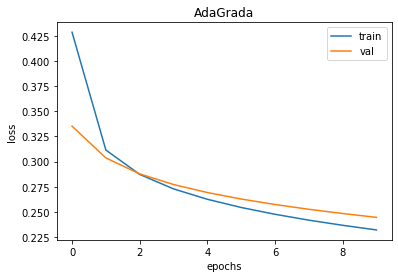

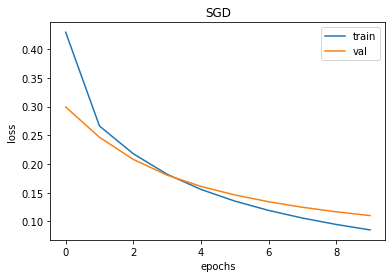

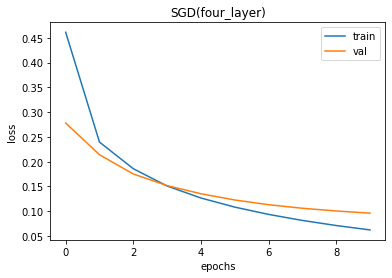

In [508]:
import matplotlib.pyplot as plt
models = [dnn1, dnn2, dnn3]
model_name = ["AdaGrada", "SGD", "SGD(four_layer)"]
for name, model in zip(model_name, models):
    plt.plot([i for i in range(len(model.cost_list_tr))],model.cost_list_tr, label="train")
    plt.plot([i for i in range(len(model.cost_list_val))],model.cost_list_val, label="val")
    plt.title(name)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend(loc="best")
    plt.show()